<a href="https://colab.research.google.com/github/MROWAtk/PUM/blob/main/Lab5_Drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np
from math import log2
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = datasets.load_iris()

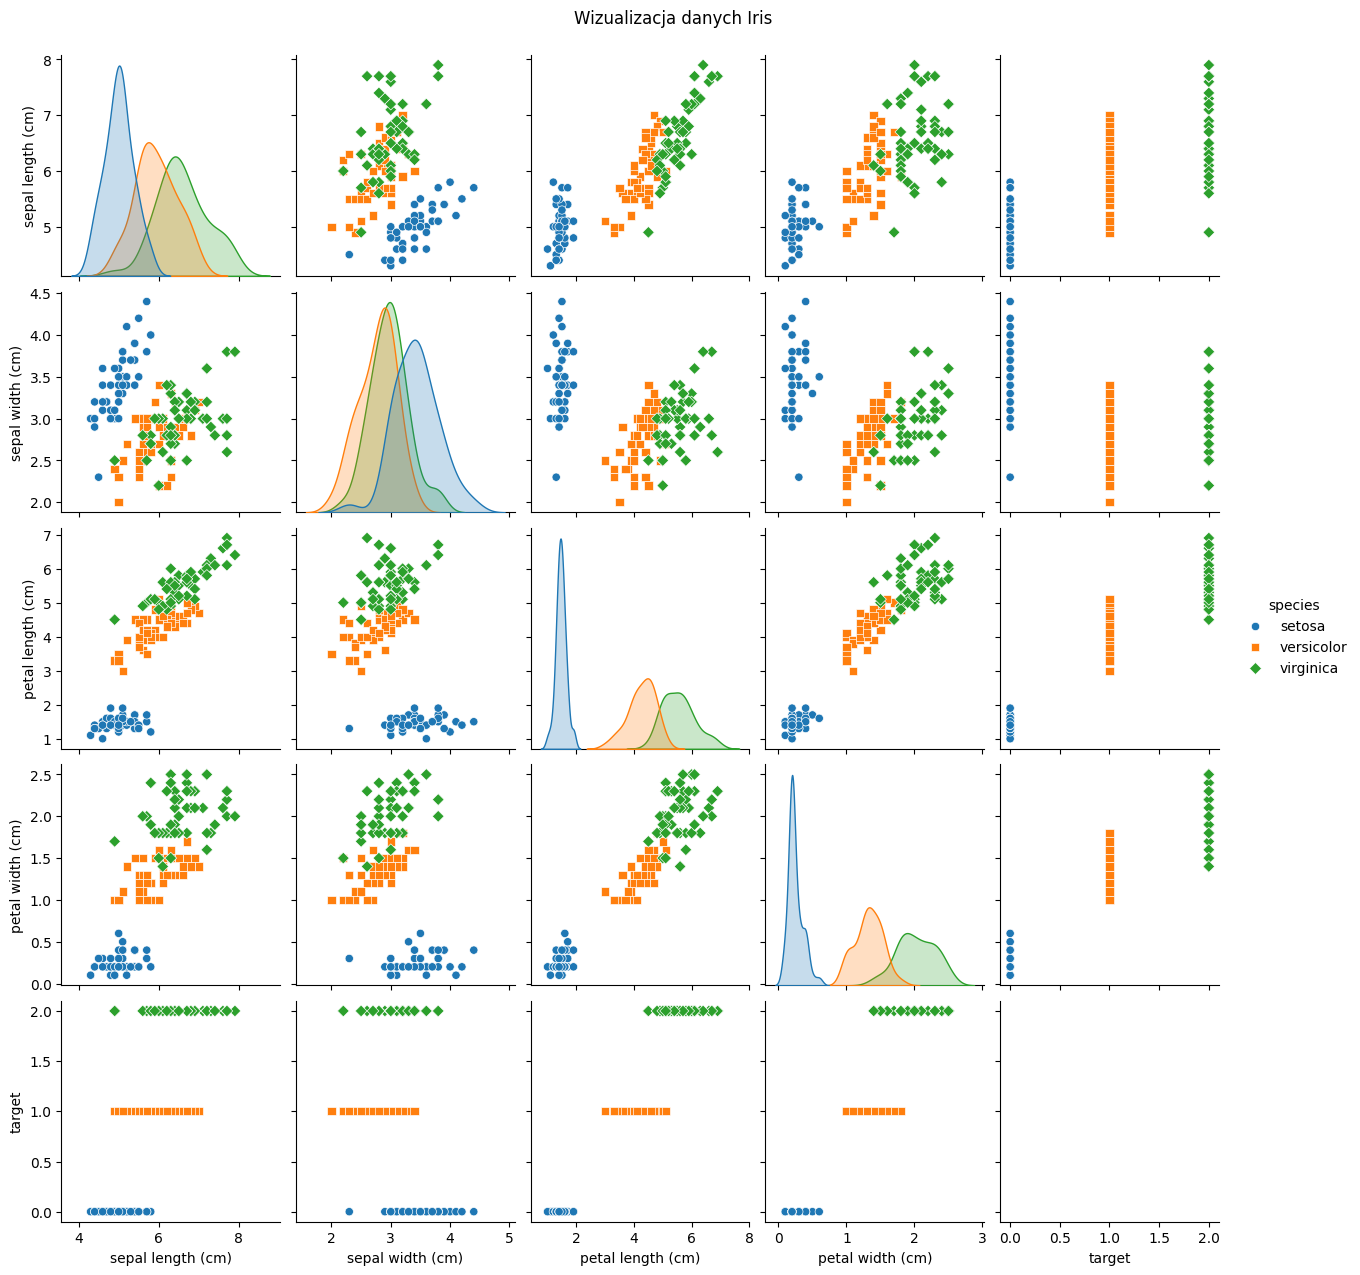

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df['species'] = df['target'].apply(lambda x: data.target_names[x])

sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Wizualizacja danych Iris", y=1.02)
plt.show()

In [4]:
def entropia(labels):
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

entropia_calosci = entropia(data['target'])

print(f"Entropia całości wynosi: {entropia_calosci}")

Entropia całości wynosi: 1.584962500721156


In [17]:
def zysk_informacyjny(data, feature, threshold):
    left_split = data[data[feature] <= threshold]
    right_split = data[data[feature] > threshold]

    l_entropia = entropia(left_split['target'])
    p_entropia = entropia(right_split['target'])

    wazona_entropia = (
        len(left_split) / len(data) * l_entropia +
        len(right_split) / len(data) * p_entropia
    )

    zysk_info = entropia_calosci - wazona_entropia
    return zysk_info

In [19]:
# Obliczenie zysku informacyjnego
zysk_15 = zysk_informacyjny(df, 'petal width (cm)', 1.5)
zysk_038 = zysk_informacyjny(df, 'petal width (cm)', 0.38)

print(f"Zysk informacyjny dla podziału przy 1.5: {zysk_15:.4f}")
print(f"Zysk informacyjny dla podziału przy 0.38: {zysk_038:.4f}")

Zysk informacyjny dla podziału przy 1.5: 0.6656
Zysk informacyjny dla podziału przy 0.38: 0.6195


In [15]:
X = data.data
y = data.target

# Podział na zbiór treningowy i testowy (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [16]:
# Drzewo decyzyjne
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Las losowy (15 drzew)
forest_clf = RandomForestClassifier(n_estimators=15, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

# Ocena dokładności
dokladnosc_drzewa = accuracy_score(y_test, y_pred_tree)
dokladnosc_lasu = accuracy_score(y_test, y_pred_forest)

print(f"Dokładność drzewa decyzyjnego: {dokladnosc_drzewa:.4f}")
print(f"Dokładność lasu losowego (15 drzew): {dokladnosc_lasu:.4f}")

Dokładność drzewa decyzyjnego: 0.9333
Dokładność lasu losowego (15 drzew): 0.9111


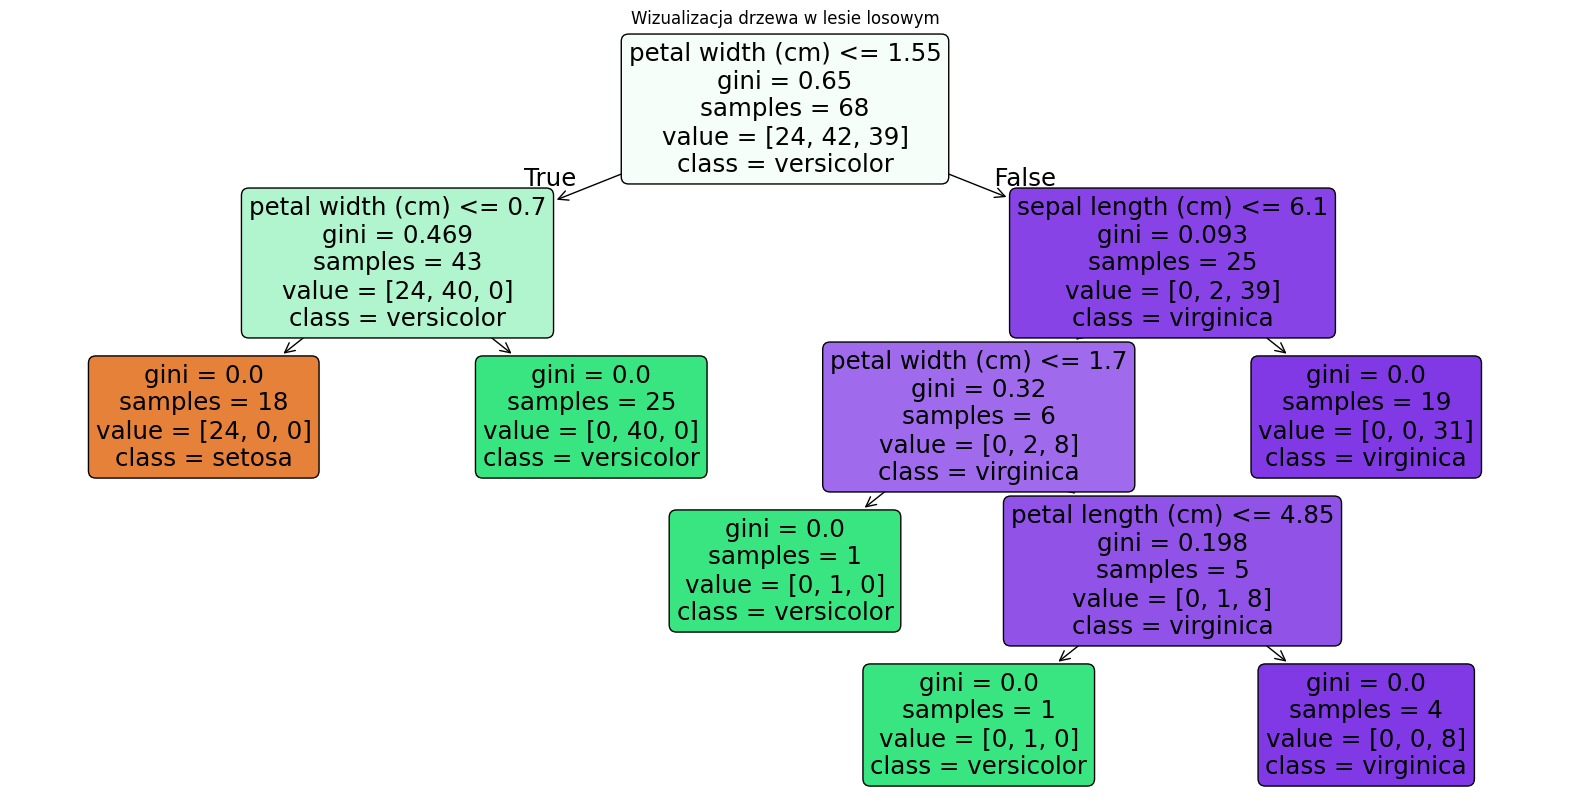

In [22]:
# Wybierz jedno drzewo z lasu losowego
tree_to_plot = forest_clf.estimators_[0]  # Wybieramy pierwsze drzewo w lesie

# Wizualizacja drzewa
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Wizualizacja drzewa w lesie losowym")
plt.show()